In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import time

In [2]:
import sys
sys.path.append("../code")
import model_agegroups
import plotting
import plotting_agegroups
import parameters_agegroups

In [3]:
params_m1 = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario3')
params_m2 = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario2')
params_m3 = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario1')
params_mFW = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario1')
params_mFW.update( {'alpha_w': 0.0, 'alpha_u': 0.0, 'alpha_R': 0.0,} )

# Will put all of these to a parameter file soon

plateaus = np.array([3.68853681, 3.97739323, 4.265305,   4.46268227, 4.60508098, 4.75111247])
slopes = np.array([0.02306204, 0.02098712, 0.01891899, 0.01750119, 0.01647831, 0.01542934])
fractions = np.array([0.1795,0.2352,0.2488,0.2878,0.3487,0.4296])

C_base = np.loadtxt('../parameters/C_Base.csv', delimiter=',')
C_vol = np.loadtxt('../parameters/C_vol.csv', delimiter=',')
C_npi1 = np.loadtxt('../parameters/C_NPI_general.csv', delimiter=',')
C_npi2 = np.loadtxt('../parameters/C_NPI_work.csv', delimiter=',')
C_npi3 = np.loadtxt('../parameters/C_NPI_School.csv', delimiter=',')

for p in [params_m1, params_m2, params_m3, params_mFW]:
    p['C_base'] = C_base
    p['C_vol'] = C_vol
    p['plateaus'] = plateaus
    p['slopes'] = slopes
    p['fractions'] = fractions
    p['C_npi_free'] = C_npi1 + C_npi2 + C_npi3
    p['feedback_off'] = False
params_m1['C_npi_base'] = C_npi1 + C_npi2 + C_npi3
params_m2['C_npi_base'] = C_npi3
params_m3['C_npi_base'] = np.zeros([6,6])
params_mFW['C_npi_base'] = C_npi1 + C_npi2 + C_npi3
params_mFW['feedback_off'] = True

Sapprox: 127371.52063590317
Sapprox: 68784.99630765057
Sapprox: 43800.852103956044
Sapprox: 28942.771028175128
Sapprox: 5056.555932640011
Sapprox: 286.27394705108236
Sapprox: 127371.52063590317
Sapprox: 68784.99630765057
Sapprox: 43800.852103956044
Sapprox: 28942.771028175128
Sapprox: 5056.555932640011
Sapprox: 286.27394705108236
Sapprox: 127371.52063590317
Sapprox: 68784.99630765057
Sapprox: 43800.852103956044
Sapprox: 28942.771028175128
Sapprox: 5056.555932640011
Sapprox: 286.27394705108236
Sapprox: 127371.52063590317
Sapprox: 68784.99630765057
Sapprox: 43800.852103956044
Sapprox: 28942.771028175128
Sapprox: 5056.555932640011
Sapprox: 286.27394705108236


In [4]:
m1 = model_agegroups.Model(**params_m1)
m2 = model_agegroups.Model(**params_m2)
m3 = model_agegroups.Model(**params_m3)
mFW = model_agegroups.Model(**params_mFW)

start_time = time.time()
times, data = m1.run()
print(time.time() - start_time)
times, data = m2.run()
print(time.time() - start_time)
times, data = m3.run()
print(time.time() - start_time)
times, data = mFW.run()
print(time.time() - start_time)

51.55380868911743
108.67908310890198
159.57379508018494
207.19834637641907


In [5]:
[(m.chopped_data() < 0 ).any() for m in [m1,m2,m3,mFW]]

[False, False, False, False]

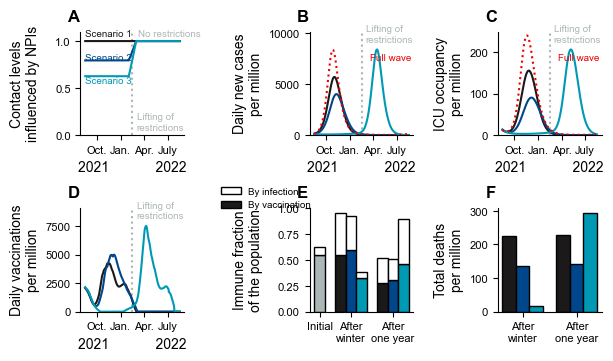

In [6]:
import importlib
importlib.reload(plotting_agegroups)
plotting_agegroups.sixpanels([m1,m2,m3], "./figures/extended_fig2.pdf", arial=True, full_wave=mFW)

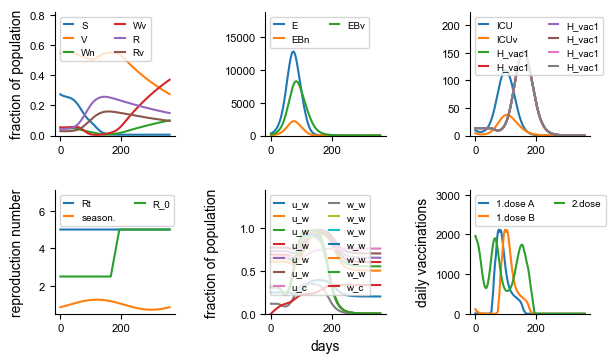

In [7]:
importlib.reload(plotting_agegroups)
plotting_agegroups.overview(m1, arial=True)

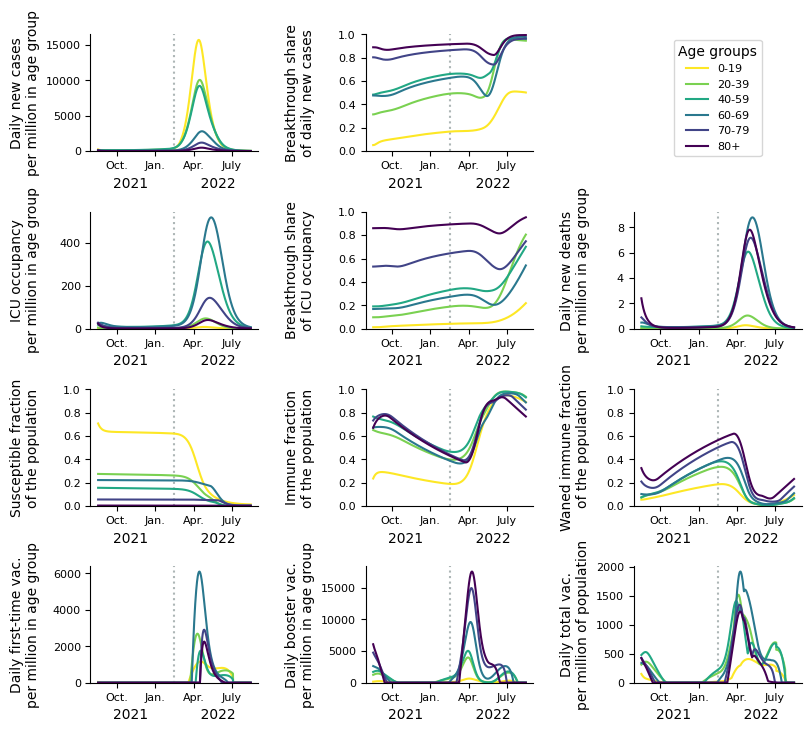

In [10]:
importlib.reload(plotting_agegroups)
plotting_agegroups.overview_agegroups(m3, path='./figures/show.pdf')

In [9]:
(C_npi1+C_npi2+C_npi3) / C_sum

NameError: name 'C_sum' is not defined

In [ ]:
C_sum = C_base+C_npi1+C_npi2+C_npi3+C_vol

In [ ]:
max(np.linalg.eigvals(C_sum))

In [ ]:
Rt(t)